`Clustering` or `cluster analysis` is an **unsupervised learning problem**.

It is often used as a data analysis technique for discovering interesting patterns in data, such as groups of customers based on their behavior.

There are many clustering algorithms to choose from and no single best clustering algorithm for all cases. Instead, it is a good idea to explore a range of clustering algorithms and different configurations for each algorithm.

#### Clustering

It involves automatically discovering natural grouping in data. Unlike supervised learning (like predictive modeling), clustering algorithms only interpret the input data and find `natural groups` or `clusters` in feature space.

Evaluation of identified clusters is subjective and may require a domain expert, although many clustering-specific quantitative measures do exist. Typically, clustering algorithms are compared academically on synthetic datasets with pre-defined clusters, which an algorithm is expected to discover.

Obective is to identify the clusters with high `intra-cluster similarity` and `low inter-cluster similarity`

#### Kmeans Algorithm

Kmeans algorithm is an iterative algorithm that tries to partition the dataset into **K** pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. 

Let’s walk through a simple 2D example to better understanding of Kmeans algorithm. Assume we have these gray points in the following figure and want to assign them into `three` clusters. K-means follows the four steps listed below.

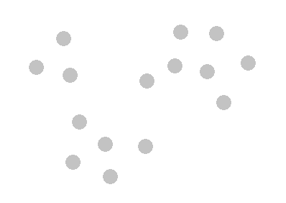

1. Initialize cluster centers

We randomly pick three points C1, C2 and C3, and label them with blue, green and red color separately to represent the cluster centers.

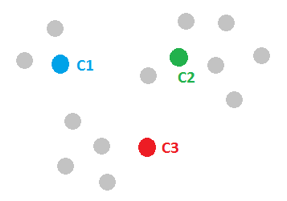

2. Assign observations to the closest cluster center

Once we have these cluster centers, we can assign each point to the clusters based on the minimum distance to the cluster center. For the gray point A, compute its distance to C1, C2 and C3, respectively. 

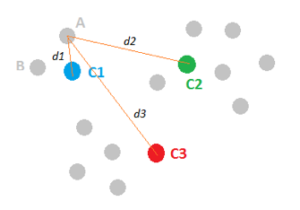

After comparing the lengths of d1, d2 and d3, we figure out that d1 is the smallest, therefore, we assign point A to the blue cluster and label it with blue. We then move to point B and follow the same procedure. This process can assign all the points and leads to the following figure.

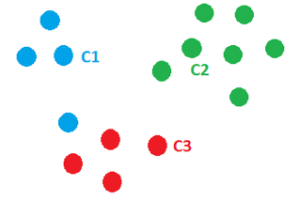

3. Revise cluster centers as mean of assigned observations

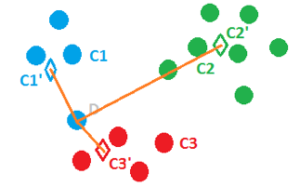

4. Repeat step 2 and step 3 until convergence

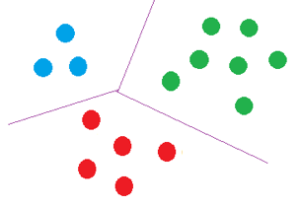

#### Points to remember

   * The k-means algorithm converges to local optimum. Therefore, the result found by K-means is not necessarily the most optimal one.
   * The initialization of the centers is critical to the quality of the solution found. There is a smarter initialization method called K-means++ that provides a more reliable solution for clustering.
   * The user has to select the number of clusters ahead of time.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [22]:
df = pd.read_csv('iris.csv')

In [23]:
df.shape

(150, 5)

In [24]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [26]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [36]:
x = df.iloc[:, [2,3]].values

In [37]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 2 2 3 2 3 3 2 3 2 3 2 2 3 2 3 2 3 2 2
 2 2 2 2 2 3 3 3 3 2 2 2 2 2 3 3 2 2 3 3 3 3 3 2 3 3 4 0 4 0 0 4 2 4 0 4 0
 0 0 0 0 0 0 4 4 2 0 0 4 2 0 4 2 2 0 0 4 4 0 2 0 4 0 0 2 0 0 0 0 4 0 0 0 0
 0 0]


There’s a method called the `Elbow method`, which is designed to help find the optimal number of clusters in a dataset. So let’s use this method to calculate the optimum value of **k**.

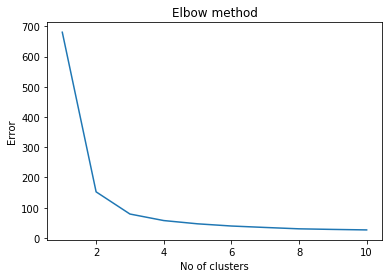

In [29]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

As you can see, the optimal value of `k`  is between `2` and `4`, as the elbow-like shape is formed at **k=3** in the above graph.

Let’s implement k-means again using k=3

In [38]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]


In [39]:
kmeans3.cluster_centers_

array([[1.464     , 0.244     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

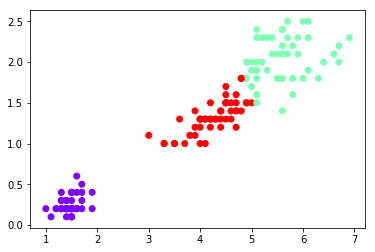

In [40]:
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans3,cmap='rainbow');

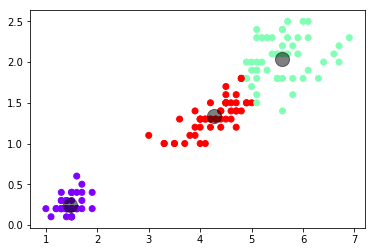

In [41]:
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans3,cmap='rainbow');
centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [14]:
y_kmeans3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [42]:
df.shape

(150, 5)

In [54]:
df['Cluster_org'] = df['species'].replace({"setosa": 0, "versicolor": 2, "virginica": 1})

In [55]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Cluster_org,Cluster_pred
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [56]:
y=df.iloc[:, 5].values

In [57]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [58]:
df['Cluster_pred']=y_kmeans3

In [59]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Cluster_org,Cluster_pred
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


In [60]:
# Index initialisation 
index = 0
  
# Output list intialisation 
Output = []  
  
# Using iteration to find 
for element in y_kmeans3: 
    if element != y[index]: 
        Output.append(index) 
    index = index + 1
  
# Printing output 
print(Output) 

[77, 83, 106, 119, 126, 138]


In [61]:
df.iloc[[77, 83, 106, 119, 126, 138]]

,sepal_length,sepal_width,petal_length,petal_width,species,Cluster_org,Cluster_pred
77,6.7,3.0,5.0,1.7,versicolor,2,1
83,6.0,2.7,5.1,1.6,versicolor,2,1
106,4.9,2.5,4.5,1.7,virginica,1,2
119,6.0,2.2,5.0,1.5,virginica,1,2
126,6.2,2.8,4.8,1.8,virginica,1,2
138,6.0,3.0,4.8,1.8,virginica,1,2


### Challenge-1

Initial Data points along with the initial centers looks like this

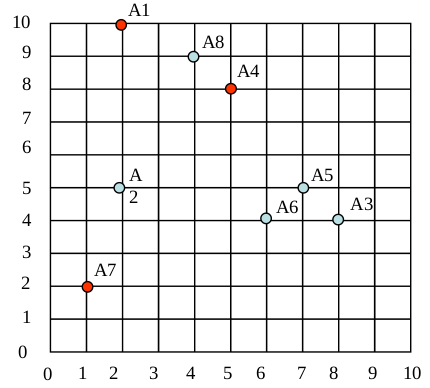

Final Clustering should looks like this

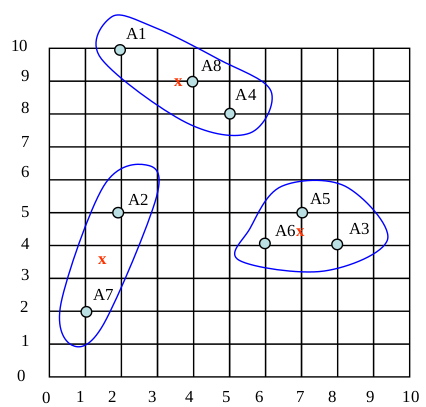

Write down how many iterations are required to reach the final postion of the clusters shown above